In [1]:
%matplotlib inline
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set(font='Noto Sans CJK TC')
mpl.style.use('ggplot')  # must put after sns.set

In [2]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.api import anova_lm

/Users/mosky/.local/share/virtualenvs/data-science-with-python-JMAT8Joy/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


## The Star98 Dataset

In [3]:
# Number of Observations - 303 (counties in California).
# 
# Number of Variables - 13 and 8 interaction terms.
# 
# Definition of variables names::
# 
#     NABOVE   - Total number of students above the national median for the
#                math section.
#     NBELOW   - Total number of students below the national median for the
#                math section.
#     LOWINC   - Percentage of low income students
#     PERASIAN - Percentage of Asian student
#     PERBLACK - Percentage of black students
#     PERHISP  - Percentage of Hispanic students
#     PERMINTE - Percentage of minority teachers
#     AVYRSEXP - Sum of teachers' years in educational service divided by the
#             number of teachers.
#     AVSALK   - Total salary budget including benefits divided by the number
#                of full-time teachers (in thousands)
#     PERSPENK - Per-pupil spending (in thousands)
#     PTRATIO  - Pupil-teacher ratio.
#     PCTAF    - Percentage of students taking UC/CSU prep courses
#     PCTCHRT  - Percentage of charter schools
#     PCTYRRND - Percentage of year-round schools
# 
#     The below variables are interaction terms of the variables defined
#     above.
# 
#     PERMINTE_AVYRSEXP
#     PEMINTE_AVSAL
#     AVYRSEXP_AVSAL
#     PERSPEN_PTRATIO
#     PERSPEN_PCTAF
#     PTRATIO_PCTAF
#     PERMINTE_AVTRSEXP_AVSAL
#     PERSPEN_PTRATIO_PCTAF
#
# ref: http://www.statsmodels.org/stable/datasets/generated/star98.html

star98_df = sm.datasets.star98.load_pandas().data
star98_df = star98_df.drop(columns=(
    colname
    for colname in star98_df.columns
    if '_' in colname
))
display(
    star98_df.head(),
    star98_df.tail(),
    star98_df.dtypes
)

,NABOVE,NBELOW,LOWINC,PERASIAN,PERBLACK,PERHISP,PERMINTE,AVYRSEXP,AVSALK,PERSPENK,PTRATIO,PCTAF,PCTCHRT,PCTYRRND
0,452.0,355.0,34.39730,23.299300,14.235280,11.411120,15.91837,14.70646,59.15732,4.445207,21.71025,57.03276,0.0,22.222220
1,144.0,40.0,17.36507,29.328380,8.234897,9.314884,13.63636,16.08324,59.50397,5.267598,20.44278,64.62264,0.0,0.000000
2,337.0,234.0,32.64324,9.226386,42.406310,13.543720,28.83436,14.59559,60.56992,5.482922,18.95419,53.94191,0.0,0.000000
3,395.0,178.0,11.90953,13.883090,3.796973,11.443110,11.11111,14.38939,58.33411,4.165093,21.63539,49.06103,0.0,7.142857
4,8.0,57.0,36.88889,12.187500,76.875000,7.604167,43.58974,13.90568,63.15364,4.324902,18.77984,52.38095,0.0,0.000000


,NABOVE,NBELOW,LOWINC,PERASIAN,PERBLACK,PERHISP,PERMINTE,AVYRSEXP,AVSALK,PERSPENK,PTRATIO,PCTAF,PCTCHRT,PCTYRRND
298,96.0,246.0,62.23968,13.820860,3.956157,32.12879,15.884480,13.27089,52.88133,4.324174,20.98711,8.00000,0.0,18.181820
299,37.0,117.0,46.16188,1.150575,0.800400,45.62281,13.333330,11.80714,48.42615,3.945069,19.85830,53.77358,0.0,0.000000
300,208.0,387.0,43.41431,3.648564,1.541204,46.31998,21.377670,14.40468,53.79616,3.845481,22.70884,29.89247,0.0,6.666667
301,199.0,510.0,70.62104,20.461720,2.989345,17.42305,11.032860,16.56420,61.70566,3.970984,24.88647,15.14286,0.0,13.636360
302,72.0,84.0,77.74827,5.998899,9.576225,11.11723,7.874016,16.91871,65.09957,6.913397,20.03252,23.52941,0.0,0.000000


NABOVE      float64
NBELOW      float64
LOWINC      float64
PERASIAN    float64
PERBLACK    float64
PERHISP     float64
PERMINTE    float64
AVYRSEXP    float64
AVSALK      float64
PERSPENK    float64
PTRATIO     float64
PCTAF       float64
PCTCHRT     float64
PCTYRRND    float64
dtype: object

### The Pairwise Relationships – Correlation Coefficient Matrix

In [4]:
# np.corrcoef(star98_df.T)

In [5]:
# ccm: correlation coefficient matrix
star98_ccm_df = pd.DataFrame(
    data=np.corrcoef(star98_df.T),
    columns=star98_df.columns,
    index=star98_df.columns
)

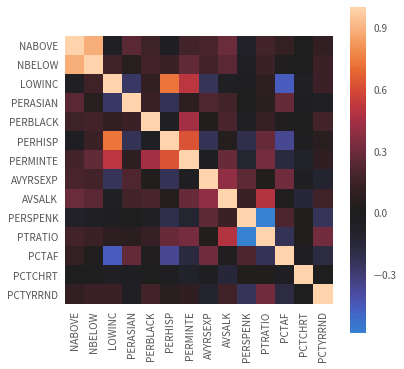

In [6]:
plt.subplots(figsize=(6, 6))
sns.heatmap(star98_ccm_df, center=0, square=True)

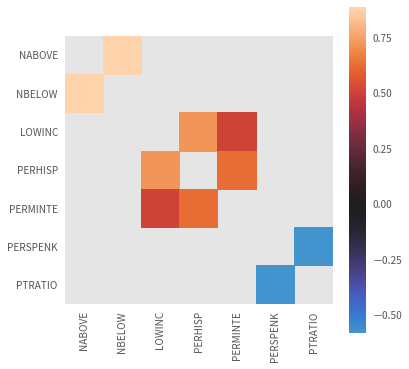

In [7]:
plt.subplots(figsize=(6, 6))
sns.heatmap(
    star98_ccm_df[
        (np.abs(star98_ccm_df) >= 0.5) &
        ~np.isclose(star98_ccm_df, 1)
    ]
    .dropna(axis='index', how='all')
    .dropna(axis='columns', how='all'),
    center=0,
    square=True,
)

In [8]:
# ≥ 0.5: moderate ± linear relationship
star98_ccm_df.LOWINC[np.abs(star98_ccm_df.LOWINC) >= 0.5].sort_values()

PERMINTE    0.508351
PERHISP     0.723228
LOWINC      1.000000
Name: LOWINC, dtype: float64

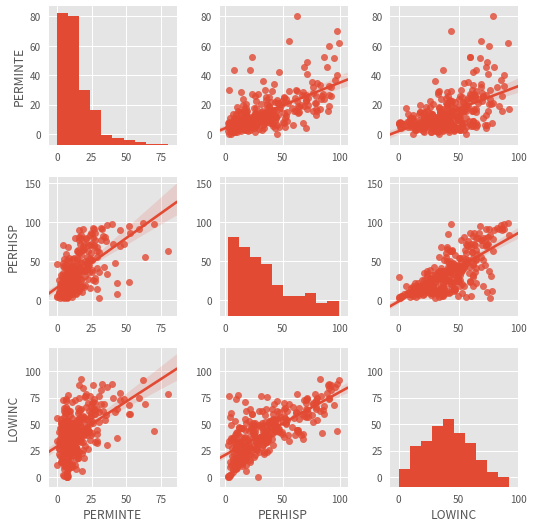

In [9]:
sns.pairplot(
    data=star98_df,
    vars=star98_ccm_df.LOWINC[star98_ccm_df.LOWINC >= 0.5].sort_values().index,
    kind='reg',
)

### The X-Y Relationships – Regression

In [10]:
star98_ols_res = ols('''
    NABOVE ~
        LOWINC +
        PERASIAN + PERBLACK + PERHISP + PERMINTE +
        AVYRSEXP + AVSALK +
        PERSPENK + PTRATIO +
        PCTAF + PCTCHRT + PCTYRRND
''', star98_df).fit()
star98_ols_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 NABOVE   R-squared:                       0.182
Model:                            OLS   Adj. R-squared:                  0.148
Method:                 Least Squares   F-statistic:                     5.389
Date:                Thu, 23 Nov 2017   Prob (F-statistic):           2.95e-08
Time:                        18:26:42   Log-Likelihood:                -2366.5
No. Observations:                 303   AIC:                             4759.
Df Residuals:                     290   BIC:                             4807.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -417.3450    729.680     -0.572      0.568   -1853.484    1018.794
LOWINC         2.9689      2.887      1.028      0.305      -2.713       8.651
PERASIAN      10.5791      4.452      2.376      0.018       1.817      19.341
PERBLACK      -2.7226      5.263     -0.517      0.605     -13.082       7.637
PERHISP       -4.3503      2.782     -1.564      0.119      -9.825       1.124
PERMINTE       9.4317      4.988      1.891      0.060      -0.387      19.250
AVYRSEXP      27.9015     22.075      1.264      0.207     -15.547      71.350
AVSALK        40.9393     10.849      3.774      0.000      19.587      62.292
PERSPENK    -289.6163     96.551     -3.000      0.003    -479.646     -99.587
PTRATIO      -48.3455     29.575     -1.635      0.103    -106.554       9.863
PCTAF          3.6236      2.636      1.375      0.170      -1.564       8.812
PCTCHRT        9.9797      6.202      1.609      0.109      -2.227      22.186
PCTYRRND       1.8527      1.707      1.085      0.279      -1.507       5.213
==============================================================================
Omnibus:                      487.341   Durbin-Watson:                   1.814
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           139466.754
Skew:                           8.366   Prob(JB):                         0.00
Kurtosis:                     106.764   Cond. No.                     1.98e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.98e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Overall

* **Df**: degree of freedom.
* **Prob (F-statistic)**: $P(\textit{the all coefficients are zeros})$.
* **R-squared**: 0 to 1, 1 indicates a best fit.
* **Adj. R-squared**: 0 to 1, adjusted for the number of explanatory variables.
* **Log-Likelihood**: lower is a better fit.
* **AIC**: Akaike information criterion; lower is a better fit.
* **BIC**: Bayesian information criterion; lower is a better fit.

Terms

* **P>|t|**: $P(\textit{the coefficient is zero})$.

Residuals

* **Durbin-Watson**: the test statistic for detecting autocorrelation.
* **Prob(Omnibus)**: $P(\textit{the residuals are normally distributed by chi-squared test})$.
* **Prob(JB)**: $P(\textit{the residuals are normally distributed by skewness and kurtosis})$.
* **Cond. No.**: condition number.

R-squared

<img style="float: left; width: 50%;" alt="Coefficient_of_Determination.svg" src="https://upload.wikimedia.org/wikipedia/commons/8/86/Coefficient_of_Determination.svg">
<p>$
R^{2} = 1 - \dfrac{
    \color{blue}{SS_{\text{res}}}
}{
    \color{red}{SS_{\text{tot}}}
}
$</p>
<p>$
\bar{R}^{2} = 1 - \dfrac{
    \color{blue}{SS_{\text{res}}} / \text{df}_{e}
}{
    \color{red}{SS_{\text{tot}}} / \text{df}_{t}
}
$</p>
<p>See also: https://en.wikipedia.org/wiki/Coefficient_of_determination .</p>

In [11]:
# < 0.05: significant
star98_ols_res.pvalues[star98_ols_res.pvalues < 0.05].sort_values()

AVSALK      0.000195
PERSPENK    0.002938
PERASIAN    0.018134
dtype: float64

#### Comparing to Correlation

In [12]:
pd.DataFrame({
    'r': star98_ccm_df.NABOVE,
    'abs_r': np.abs(star98_ccm_df.NABOVE)
}).sort_values(by='abs_r', ascending=False)

,abs_r,r
NABOVE,1.000000,1.000000
NBELOW,0.887667,0.887667
AVSALK,0.295310,0.295310
PERASIAN,0.244300,0.244300
AVYRSEXP,0.195337,0.195337
PTRATIO,0.177688,0.177688
PERMINTE,0.168120,0.168120
PERBLACK,0.150288,0.150288
PCTAF,0.115316,0.115316
PCTYRRND,0.107034,0.107034


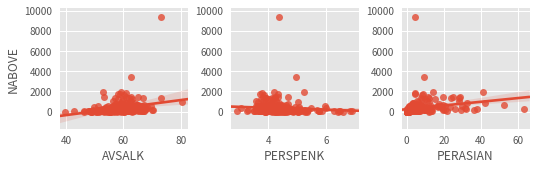

In [13]:
sns.pairplot(
    data=star98_df,
    y_vars=['NABOVE'],
    x_vars=(
        star98_ols_res.pvalues[star98_ols_res.pvalues < 0.05]
        .sort_values()
        .index
    ),
    kind='reg',
)

## The Fair Dataset

In [14]:
# Number of observations: 6366
# Number of variables: 9
# Variable name definitions:
# 
#     rate_marriage   : How rate marriage, 1 = very poor, 2 = poor, 3 = fair,
#                     4 = good, 5 = very good
#     age             : Age
#     yrs_married     : No. years married. Interval approximations. See
#                     original paper for detailed explanation.
#     children        : No. children
#     religious       : How relgious, 1 = not, 2 = mildly, 3 = fairly,
#                     4 = strongly
#     educ            : Level of education, 9 = grade school, 12 = high
#                     school, 14 = some college, 16 = college graduate,
#                     17 = some graduate school, 20 = advanced degree
#     occupation      : 1 = student, 2 = farming, agriculture; semi-skilled,
#                     or unskilled worker; 3 = white-colloar; 4 = teacher
#                     counselor social worker, nurse; artist, writers;
#                     technician, skilled worker, 5 = managerial,
#                     administrative, business, 6 = professional with
#                     advanced degree
#     occupation_husb : Husband's occupation. Same as occupation.
#     affairs         : measure of time spent in extramarital affairs
#
# ref: http://www.statsmodels.org/stable/datasets/generated/fair.html

fair_df = sm.datasets.fair.load_pandas().data
display(
    fair_df.head(),
    fair_df.tail(),
    fair_df.dtypes
)

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
6361,5.0,32.0,13.0,2.0,3.0,17.0,4.0,3.0,0.0
6362,4.0,32.0,13.0,1.0,1.0,16.0,5.0,5.0,0.0
6363,5.0,22.0,2.5,0.0,2.0,14.0,3.0,1.0,0.0
6364,5.0,32.0,6.0,1.0,3.0,14.0,3.0,4.0,0.0
6365,4.0,22.0,2.5,0.0,2.0,16.0,2.0,4.0,0.0


rate_marriage      float64
age                float64
yrs_married        float64
children           float64
religious          float64
educ               float64
occupation         float64
occupation_husb    float64
affairs            float64
dtype: object

### Are the Groups Different? – One-Way ANOVA

In [15]:
# one-way anova
anova_lm(ols('affairs ~ C(occupation)', fair_df).fit(), typ=2)

,sum_sq,df,F,PR(>F)
C(occupation),86.243777,5.0,3.560032,0.003236
Residual,30814.913769,6360.0,NaN,NaN


#### Which Group Pair Are Different?

group1,group2,meandiff,lower,upper,reject
1.0,2.0,0.2935,-0.7095,1.2966,False
1.0,3.0,0.3292,-0.6579,1.3163,False
1.0,4.0,0.1299,-0.8609,1.1207,False
1.0,5.0,0.3892,-0.6175,1.3959,False
1.0,6.0,0.7683,-0.3812,1.9178,False
2.0,3.0,0.0357,-0.2092,0.2806,False
2.0,4.0,-0.1636,-0.4231,0.0958,False
2.0,5.0,0.0957,-0.219,0.4103,False
2.0,6.0,0.4747,-0.1632,1.1127,False
3.0,4.0,-0.1993,-0.388,-0.0106,True


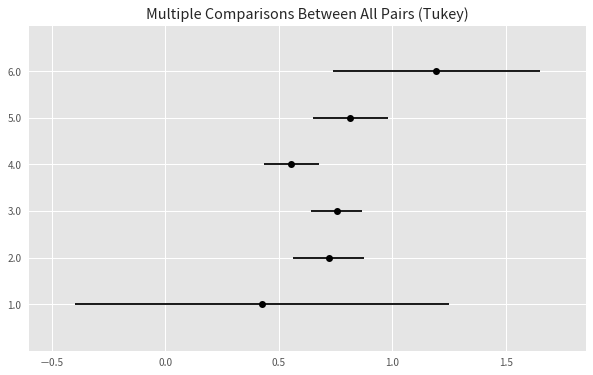

In [16]:
fair_mc = sm.stats.multicomp.MultiComparison(fair_df.affairs, fair_df.occupation)
fair_mc_tukeyhsd_res = fair_mc.tukeyhsd()
display(fair_mc_tukeyhsd_res.summary())
_ = fair_mc_tukeyhsd_res.plot_simultaneous()

### Are the Groups Dependent? – Two-Way ANOVA

In [17]:
# two-way anova
anova_lm(ols('affairs ~ C(occupation) * C(occupation_husb)', fair_df).fit(), typ=2)

,sum_sq,df,F,PR(>F)
C(occupation),86.662664,5.0,3.582248,0.003087
C(occupation_husb),26.060631,5.0,1.077230,0.370706
C(occupation):C(occupation_husb),161.452272,25.0,1.334743,0.122753
Residual,30627.400866,6330.0,NaN,NaN


* **C(occupation):C(occupation_husb)**: the interaction term.

---

# The Lab of Lab

In [18]:
anova_lm(ols('affairs ~ C(occupation) + C(rate_marriage)', fair_df).fit(), typ=2)

,sum_sq,df,F,PR(>F)
C(occupation),57.503559,5.0,2.457425,3.116884e-02
C(rate_marriage),1068.934520,4.0,57.101396,2.084439e-47
Residual,29745.979249,6356.0,NaN,NaN


In [19]:
anova_lm(ols('affairs ~ C(occupation) * C(rate_marriage)', fair_df).fit(), typ=2)  # !

,sum_sq,df,F,PR(>F)
C(occupation),1.855159e-09,5.0,7.924338e-11,1.00000
C(rate_marriage),4.276516e-08,4.0,2.283400e-09,1.00000
C(occupation):C(rate_marriage),9.519053e+01,20.0,1.016519e+00,0.43767
Residual,2.967097e+04,6337.0,NaN,NaN


In [20]:
anova_lm(ols('affairs ~ C(occupation) * rate_marriage', fair_df).fit(), typ=2)

,sum_sq,df,F,PR(>F)
C(occupation),62.078178,5.0,2.642725,2.154876e-02
rate_marriage,955.656634,1.0,203.415864,1.877494e-45
C(occupation):rate_marriage,7.886944,5.0,0.335754,8.915414e-01
Residual,29851.370191,6354.0,NaN,NaN


In [21]:
fair_ols_res = ols('''
    affairs ~
        rate_marriage + age + yrs_married + children + religious + educ +
        C(occupation) + C(occupation_husb)
''', fair_df).fit()
fair_ols_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                affairs   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     24.02
Date:                Thu, 23 Nov 2017   Prob (F-statistic):           1.23e-69
Time:                        18:26:46   Log-Likelihood:                -13874.
No. Observations:                6366   AIC:                         2.778e+04
Df Residuals:                    6349   BIC:                         2.790e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                     3.2305      0.464      6.962      0.000       2.321       4.140
C(occupation)[T.2.0]          0.2867      0.346      0.830      0.407      -0.391       0.964
C(occupation)[T.3.0]          0.3170      0.339      0.934      0.351      -0.349       0.982
C(occupation)[T.4.0]          0.2344      0.340      0.689      0.491      -0.433       0.901
C(occupation)[T.5.0]          0.4865      0.346      1.406      0.160      -0.192       1.165
C(occupation)[T.6.0]          0.8407      0.398      2.112      0.035       0.060       1.621
C(occupation_husb)[T.2.0]     0.1644      0.157      1.049      0.294      -0.143       0.472
C(occupation_husb)[T.3.0]     0.2403      0.174      1.379      0.168      -0.101       0.582
C(occupation_husb)[T.4.0]     0.1542      0.152      1.017      0.309      -0.143       0.452
C(occupation_husb)[T.5.0]     0.0881      0.153      0.574      0.566      -0.213       0.389
C(occupation_husb)[T.6.0]     0.2546      0.173      1.468      0.142      -0.085       0.595
rate_marriage                -0.4168      0.028    -14.641      0.000      -0.473      -0.361
age                          -0.0152      0.009     -1.658      0.097      -0.033       0.003
yrs_married                  -0.0163      0.010     -1.647      0.100      -0.036       0.003
children                     -0.0134      0.030     -0.443      0.658      -0.072       0.046
religious                    -0.2433      0.031     -7.814      0.000      -0.304      -0.182
educ                         -0.0055      0.016     -0.346      0.730      -0.036       0.025
==============================================================================
Omnibus:                     9383.924   Durbin-Watson:                   1.602
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          5214858.092
Skew:                           8.809   Prob(JB):                         0.00
Kurtosis:                     142.103   Cond. No.                     1.08e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.08e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
fair_anova_df = anova_lm(fair_ols_res, typ=2)
fair_anova_df.sort_values(by='PR(>F)')

,sum_sq,df,F,PR(>F)
rate_marriage,983.745513,1.0,214.358220,9.178917e-48
religious,280.238022,1.0,61.063886,6.423544e-15
C(occupation),66.520478,5.0,2.898963,1.282237e-02
age,12.608865,1.0,2.747473,9.745770e-02
yrs_married,12.455418,1.0,2.714037,9.951849e-02
C(occupation_husb),21.539504,5.0,0.938692,4.545044e-01
children,0.901677,1.0,0.196476,6.575960e-01
educ,0.548757,1.0,0.119574,7.295083e-01
Residual,29137.209033,6349.0,NaN,NaN


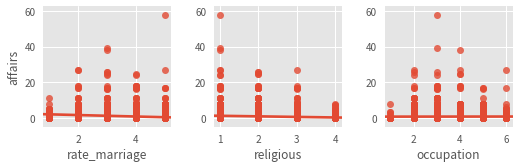

In [23]:
sns.pairplot(
    data=fair_df,
    y_vars='affairs',
    x_vars=['rate_marriage', 'religious', 'occupation'],
    kind='reg',
)

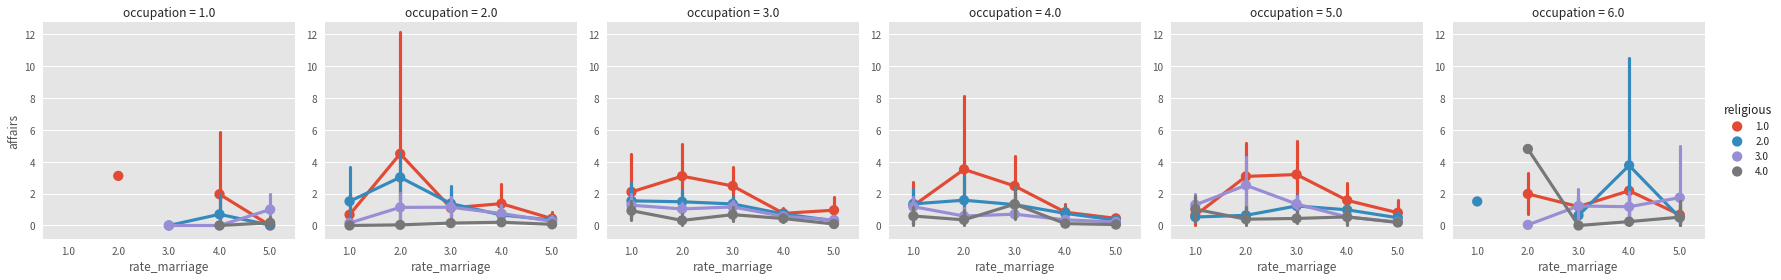

In [24]:
sns.factorplot(
    data=fair_df,
    y='affairs',
    x='rate_marriage',
    hue='religious',
    col='occupation',
)